In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/My Drive/ITMO/ML/Lab1/bioresponse.csv', header=0, sep=',')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 1 task

Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier

In [ ]:
feats = data.loc[:, data.columns != 'Activity']
target = data["Activity"]

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(feats, target, test_size = 0.3, random_state = 1)

*   **small decision tree**

In [ ]:
sdt = tree.DecisionTreeClassifier(max_depth=2, random_state=1)
sdt.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [ ]:
pred_sdt = sdt.predict(test_data)
metrics.accuracy_score(test_labels, pred_sdt)

0.7602131438721137

*   **deep decision tree**

In [ ]:
ddt = tree.DecisionTreeClassifier(max_depth=100, random_state=1)
ddt.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=100, random_state=1)

In [ ]:
pred_ddt = ddt.predict(test_data)
metrics.accuracy_score(test_labels, pred_ddt)

0.7007104795737122

*   **random forest on small trees**

In [ ]:
rfst = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
rfst.fit(train_data, train_labels)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=1)

In [ ]:
pred_rfst = rfst.predict(test_data)
metrics.accuracy_score(test_labels, pred_rfst)

0.6980461811722913

*   **random forest on deep trees**

In [ ]:
rfdt = RandomForestClassifier(n_estimators = 50, max_depth = 100, random_state = 1)
rfdt.fit(train_data, train_labels)

RandomForestClassifier(max_depth=100, n_estimators=50, random_state=1)

In [ ]:
pred_rfdt = rfdt.predict(test_data)
metrics.accuracy_score(test_labels, pred_rfdt)

0.7957371225577264

# 2 task

Calculate the following metrics to check the quality of your models:

In [ ]:
from sklearn import metrics as m

oprint = lambda name, value: print(f'{name}: {value}\n') 

def get_metric(name, metric_func, y_test, y_out):
  metric = metric_func(y_test, y_out)
  oprint(name, metric)
  return metric

*   **precision**


In [ ]:
# small decision tree
precision_sdt = get_metric('small decision tree', m.precision_score, test_labels, pred_sdt)

# deep decision tree
precision_ddt = get_metric('deep decision tree', m.precision_score, test_labels, pred_ddt)
# precision_ddt = m.precision_score(test_labels, pred_ddt)
# oprint('deep decision tree', precision_ddt)

# random forest on small trees
precision_rfst = get_metric('random forest on small trees', m.precision_score, test_labels, pred_rfst)
# precision_rfst = m.precision_score(test_labels, pred_rfst)
# oprint('random forest on small trees', precision_rfst)

# random forest on deep trees
precision_rfdt = get_metric('random forest on deep trees', m.precision_score, test_labels, pred_rfdt)
# precision_rfdt = m.precision_score(test_labels, pred_rfdt)
# oprint('random forest on deep trees', precision_rfdt)

small decision tree: 0.748587570621469

deep decision tree: 0.7339901477832512

random forest on small trees: 0.6931506849315069

random forest on deep trees: 0.8266666666666667



*   **recall**

In [ ]:
tmp_func = m.recall_score

# small decision tree
racall_sdt = get_metric('small decision tree', tmp_func, test_labels, pred_sdt)

# deep decision tree
racall_ddt = get_metric('deep decision tree', tmp_func, test_labels, pred_ddt)

# random forest on small trees
racall_rfst = get_metric('random forest on small trees', tmp_func, test_labels, pred_rfst)

# random forest on deep trees
racall_rfdt = get_metric('random forest on deep trees', tmp_func, test_labels, pred_rfdt)

small decision tree: 0.8520900321543409

deep decision tree: 0.7186495176848875

random forest on small trees: 0.8135048231511254

random forest on deep trees: 0.797427652733119



*   **accuracy**

In [ ]:
tmp_func = m.accuracy_score

# small decision tree
racall_sdt = get_metric('small decision tree', tmp_func, test_labels, pred_sdt)

# deep decision tree
racall_ddt = get_metric('deep decision tree', tmp_func, test_labels, pred_ddt)

# random forest on small trees
racall_rfst = get_metric('random forest on small trees', tmp_func, test_labels, pred_rfst)

# random forest on deep trees
racall_rfdt = get_metric('random forest on deep trees', tmp_func, test_labels, pred_rfdt)

small decision tree: 0.7602131438721137

deep decision tree: 0.7007104795737122

random forest on small trees: 0.6980461811722913

random forest on deep trees: 0.7957371225577264



*   **F1-score**

In [ ]:
tmp_func = m.f1_score

# small decision tree
racall_sdt = get_metric('small decision tree', tmp_func, test_labels, pred_sdt)

# deep decision tree
racall_ddt = get_metric('deep decision tree', tmp_func, test_labels, pred_ddt)

# random forest on small trees
racall_rfst = get_metric('random forest on small trees', tmp_func, test_labels, pred_rfst)

# random forest on deep trees
racall_rfdt = get_metric('random forest on deep trees', tmp_func, test_labels, pred_rfdt)

small decision tree: 0.7969924812030076

deep decision tree: 0.7262388302193338

random forest on small trees: 0.7485207100591715

random forest on deep trees: 0.811783960720131



*   **log-loss**

In [ ]:
tmp_func = m.log_loss

# small decision tree
racall_sdt = get_metric('small decision tree', tmp_func, test_labels, pred_sdt)

# deep decision tree
racall_ddt = get_metric('deep decision tree', tmp_func, test_labels, pred_ddt)

# random forest on small trees
racall_rfst = get_metric('random forest on small trees', tmp_func, test_labels, pred_rfst)

# random forest on deep trees
racall_rfdt = get_metric('random forest on deep trees', tmp_func, test_labels, pred_rfdt)

small decision tree: 8.282071007964884

deep decision tree: 10.337208863115979

random forest on small trees: 10.42927449741918

random forest on deep trees: 7.055063702453106



# 3 task

Plot precision-recall and ROC curves for your models.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_curve, roc_auc_score

*   **Precision-Recall curves**

In [ ]:
# Precision-Recall curve
def task3_prec_recall(name, cls):
  pred_proba = cls.predict_proba(test_data)
  prec, rec, thresh = precision_recall_curve(test_labels, pred_proba[:,1])
  plt.figure(figsize=(9, 6))
  plt.grid()
  plt.plot(thresh, prec[:-1], label="Precision")
  plt.plot(thresh, rec[:-1], label="Recall")
  plt.xlabel(u"Threshold",fontsize = 15)
  plt.title(f'Precision-Recall curve [{name}]',fontsize = 15)
  plt.legend(fontsize = 15)
  pass

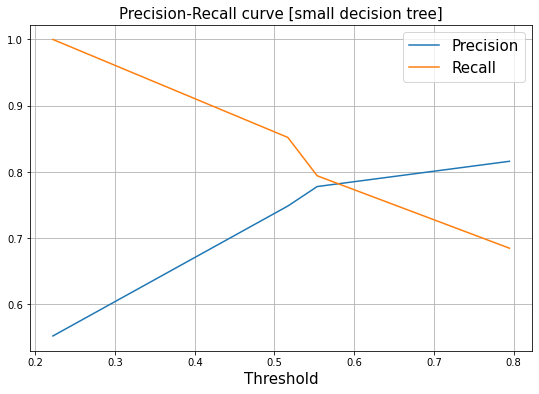

In [ ]:
# small decision tree
task3_prec_recall('small decision tree', sdt)


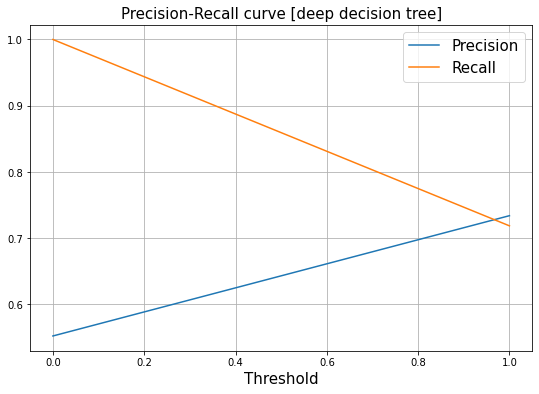

In [ ]:
# deep decision tree
task3_prec_recall('deep decision tree', ddt)


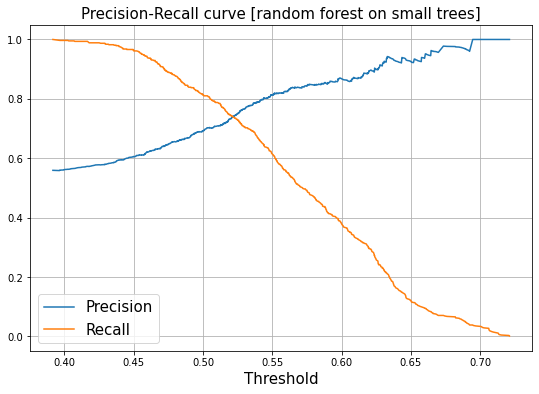

In [ ]:
# random forest on small trees
task3_prec_recall('random forest on small trees', rfst)


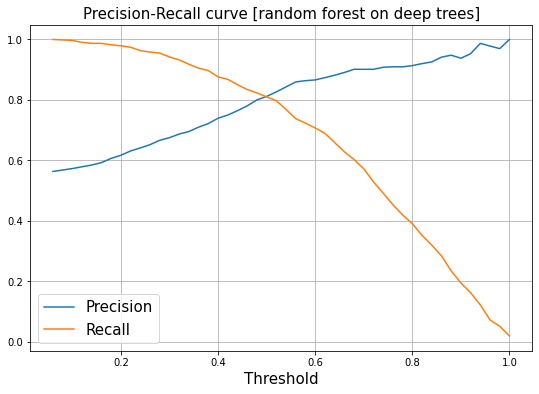

In [ ]:
# random forest on deep trees
task3_prec_recall('random forest on deep trees', rfdt)


*   **ROC-curves**

In [ ]:
# ROC-curve
def task3_roc_curve(name, cls):
  pred_proba = cls.predict_proba(test_data)
  fpr, tpr, thr = roc_curve(test_labels, pred_proba[:,1])
  roc_auc = roc_auc_score(pred_proba[:,1].round(0), test_labels)

  plt.figure(figsize = (9,6))
  plt.plot(fpr, tpr, label='ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
  plt.grid()
  plt.xlabel("false positive rate",fontsize = 15)
  plt.ylabel("true positive rate",fontsize = 15)
  plt.title(f"ROC curve [{name}]",fontsize = 15)
  plt.legend(fontsize = 15)

  pass

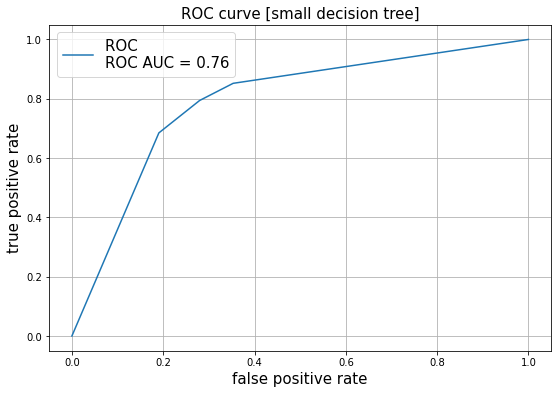

In [ ]:
# small decision tree
task3_roc_curve('small decision tree', sdt)


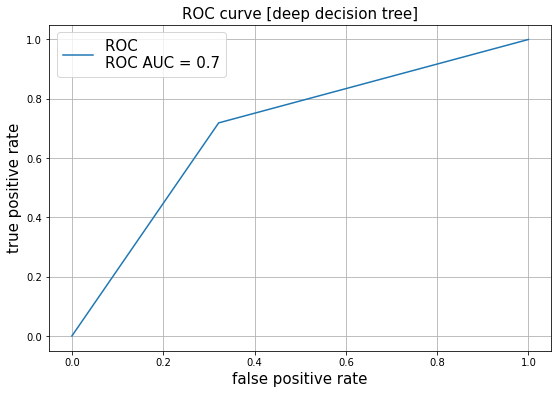

In [ ]:
# deep decision tree
task3_roc_curve('deep decision tree', ddt)


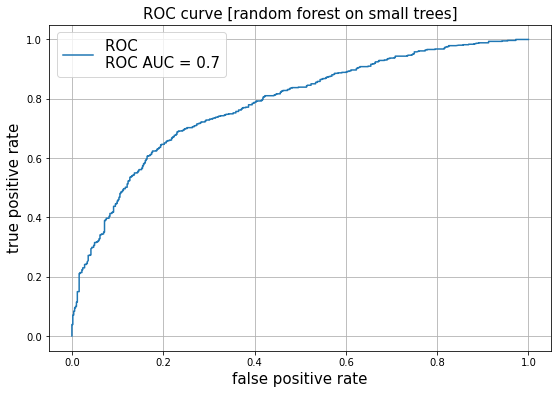

In [ ]:
# random forest on small trees
task3_roc_curve('random forest on small trees', rfst)


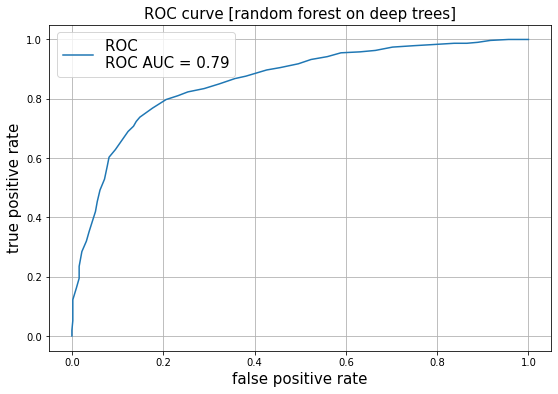

In [ ]:
# random forest on deep trees
task3_roc_curve('random forest on deep trees', rfdt)

# 4 task

Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it

In [ ]:
from sklearn.tree import DecisionTreeClassifier

T = .5

own_class_weight = {
    0: 1, 
    1: 20
}
clf = DecisionTreeClassifier(
    random_state = 2
    , max_depth = 10
    , min_samples_leaf=10
    # , min_weight_fraction_leaf=.5
    , class_weight=own_class_weight
    )
clf.fit(train_data, train_labels)

pred = (clf.predict_proba(test_data)[:,1] >= T).astype(bool)

print(f'Choosen classifier (T > {T}):\n'+'='*50+'\n')
prec_own    = get_metric('precision_score ', m.precision_score, test_labels, pred)
recall_own  = get_metric('recall_score ', m.recall_score, test_labels, pred)
acc_own     = get_metric('accuracy_score', m.accuracy_score, test_labels, pred)
f1_own      = get_metric('f1_score ', m.f1_score, test_labels, pred)
logloss_own = get_metric('log_loss ', m.log_loss, test_labels, pred)

print('='*50+'\n')
recall_cond = (recall_own > .95)
print(f'recall_score ({round(recall_own, 2)})', '>' if recall_cond else '<', '0.95', '\t[GOOD]' if recall_cond else '\t[BAD]')


Choosen classifier (T > 0.5):

precision_score : 0.6032225579053374

recall_score : 0.9630225080385852

accuracy_score: 0.6296625222024866

f1_score : 0.741795665634675

log_loss : 12.791283124391876


recall_score (0.96) > 0.95 	[GOOD]
